In [17]:
from openpyxl.styles.alignment import horizontal_alignments

from hrv import calculate_HRV_metrics,process_HRV_files
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import warnings
# FutureWarning may occur in the pd.concat method. it doesn't affect the running of this code,so ignore it
warnings.simplefilter(action='ignore', category=FutureWarning)

# TASK 2

In [18]:
# create a file list based on file column in 'fantasia_individuals.csv'
file_list = pd.read_csv('fantasia_individuals.csv')
file_list = pd.DataFrame(file_list)
# modify the path to ensure that python can find the right path of these files
file_list['file'] = "investigating_hrv_dataset/" + file_list['file']
file_list = file_list['file']

fantasia = process_HRV_files(file_list, 'fantasia.csv')

# TASK 3

In [19]:
# load data in 'fantasia.csv' and 'fantasia_individuals.csv' into fantasia_data and indvd_data respectively
fantasia_data = pd.read_csv('fantasia.csv')
hrv_df = pd.DataFrame(fantasia_data)
indvd_data = pd.read_csv('fantasia_individuals.csv')
indvd_data = pd.DataFrame(indvd_data)
# merge age sex from 'fantasia_individuals.csv' to hrv_df
hrv_df = pd.merge(hrv_df,indvd_data[['file','age','sex']],left_on='filename',right_on='file',how='right')
# rename the sex to gender in hrv_df
hrv_df.rename(columns={'sex':'gender'},inplace=True)

In [20]:
hrv_df

,filename,mean_nn,mean_bpm,sdnn,rmssd,pnn20,pnn50,file,age,gender
0,o01.csv,1011,59.3,48.0,15.5,13.0,0.6,o01.csv,77,F
1,o02.csv,1062,56.5,33.7,15.0,12.6,0.4,o02.csv,73,F
2,o03.csv,1004,59.8,47.9,23.7,26.9,3.1,o03.csv,73,M
3,o04.csv,1163,51.6,116.3,118.1,40.3,12.5,o04.csv,81,M
4,o05.csv,1088,55.1,43.2,11.3,6.0,0.1,o05.csv,76,M
5,o06.csv,1168,51.4,23.9,19.9,24.6,0.7,o06.csv,74,F
6,o07.csv,1012,59.3,50.7,27.0,33.0,4.5,o07.csv,68,M
7,o08.csv,850,70.6,43.8,24.2,32.6,3.4,o08.csv,73,F
8,o09.csv,1470,40.8,94.4,66.5,66.7,34.4,o09.csv,71,M
9,o10.csv,880,68.2,57.3,20.9,27.7,2.0,o10.csv,71,F


# TASK 4

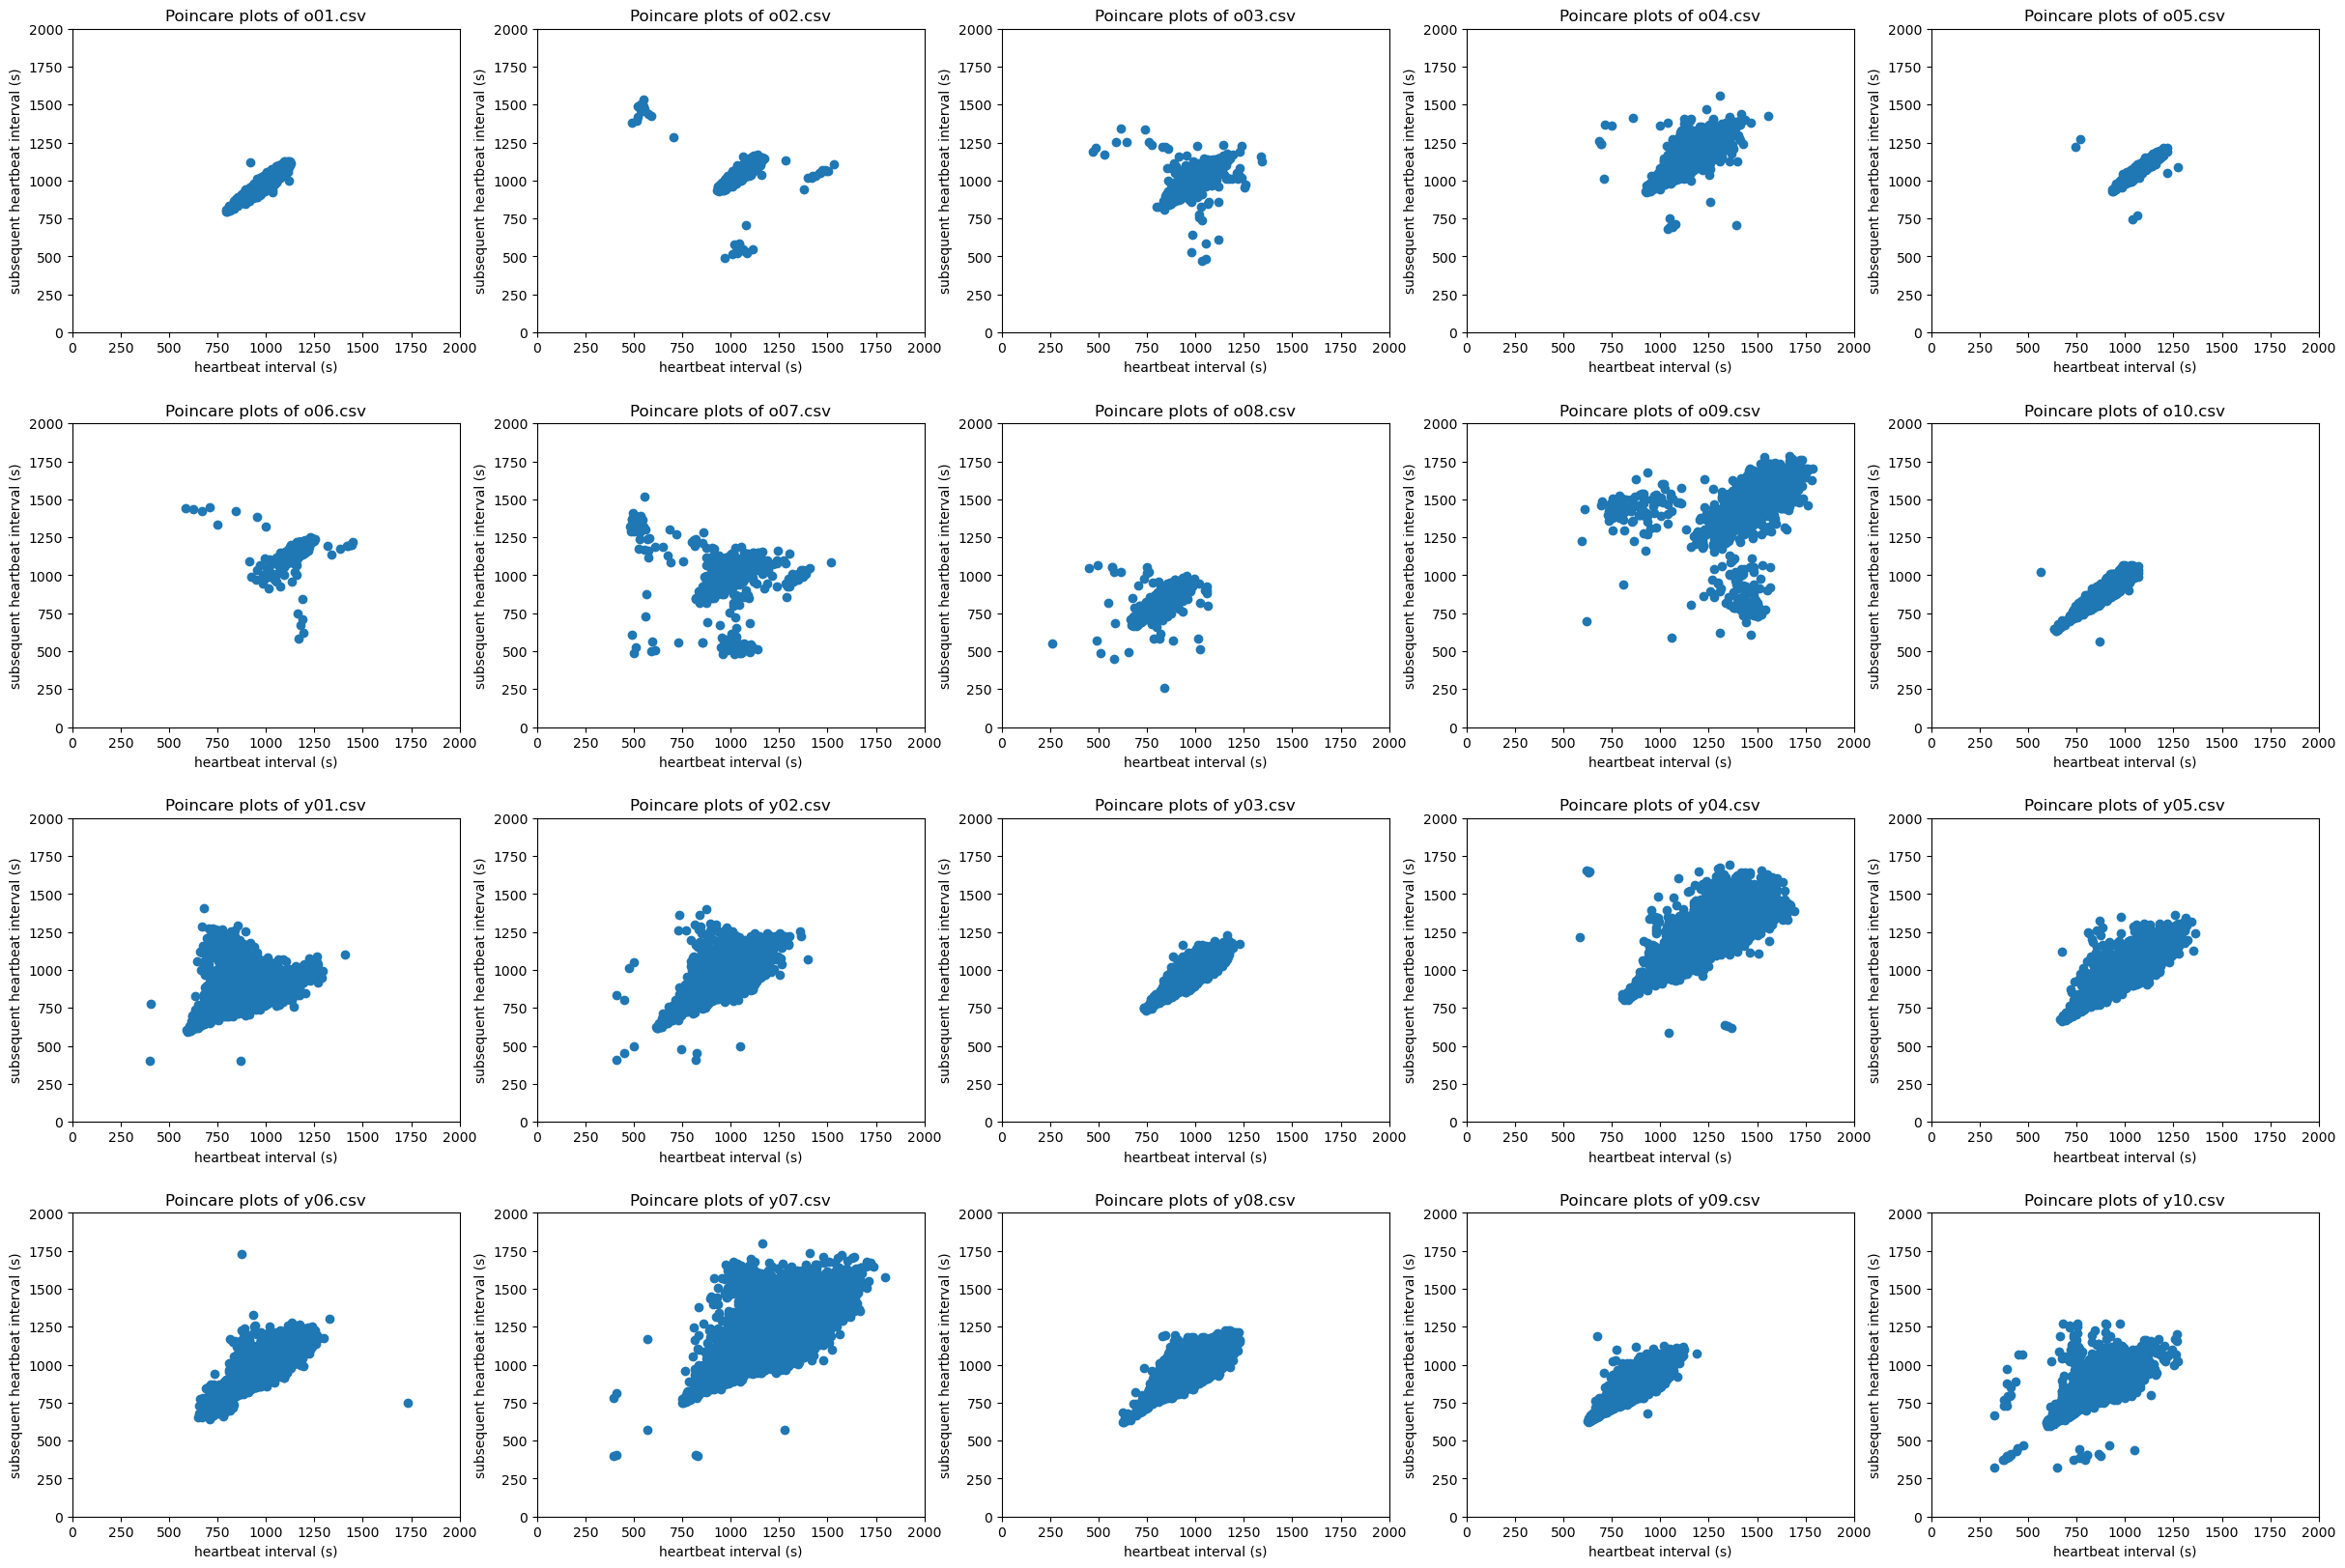

In [21]:
fig,axs = plt.subplots(4,5,figsize = (30,20))

# iterate file list to get each file
for i,file in enumerate(file_list):
    try:
        if os.path.exists(file):
            #get the data that i want from each file
            data = pd.read_csv(file)
            df = pd.DataFrame(data)
            df['time_next'] = df['time'].shift(-1)
            df['rr'] = df['time_next'] - df['time']
            df['rr_next'] = df['rr'].shift(-1)
            #visualise this data into a 4*5 figure
            axs[i//5][i % 5].scatter(df['rr'],df['rr_next'])
            axs[i//5][i % 5].set_xlim(0,2000)
            axs[i//5][i % 5].set_ylim(0,2000)
            axs[i//5][i % 5].set_title(f'Poincare plots of {file.split("/")[1]}')
            axs[i//5][i % 5].set_xlabel('heartbeat interval (s)')
            axs[i//5][i % 5].set_ylabel('subsequent heartbeat interval (s)')
        else:
            raise FileNotFoundError
    except FileNotFoundError:
        print(f"File '{file}' does not exist")
        
fig.subplots_adjust(hspace=0.3)
plt.show() 




# TASK 5

In [22]:
import pandas as pd
import numpy as np

# create an age group, the ages lower than 40 are called young,conversely, those greater than 40 are called old
age_groups = [ 0, 40, np.inf]
labels = ['young age group','old age group']
hrv_df['age_group'] = pd.cut(hrv_df['age'], bins=age_groups, labels=labels)
hrv_df

,filename,mean_nn,mean_bpm,sdnn,rmssd,pnn20,pnn50,file,age,gender,age_group
0,o01.csv,1011,59.3,48.0,15.5,13.0,0.6,o01.csv,77,F,old age group
1,o02.csv,1062,56.5,33.7,15.0,12.6,0.4,o02.csv,73,F,old age group
2,o03.csv,1004,59.8,47.9,23.7,26.9,3.1,o03.csv,73,M,old age group
3,o04.csv,1163,51.6,116.3,118.1,40.3,12.5,o04.csv,81,M,old age group
4,o05.csv,1088,55.1,43.2,11.3,6.0,0.1,o05.csv,76,M,old age group
5,o06.csv,1168,51.4,23.9,19.9,24.6,0.7,o06.csv,74,F,old age group
6,o07.csv,1012,59.3,50.7,27.0,33.0,4.5,o07.csv,68,M,old age group
7,o08.csv,850,70.6,43.8,24.2,32.6,3.4,o08.csv,73,F,old age group
8,o09.csv,1470,40.8,94.4,66.5,66.7,34.4,o09.csv,71,M,old age group
9,o10.csv,880,68.2,57.3,20.9,27.7,2.0,o10.csv,71,F,old age group


### This link show how to apply T-test by using package scipy.stats https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

T-test for mean BPM: t-statistic:0.8074291346988436, p-value:0.42996052209569513


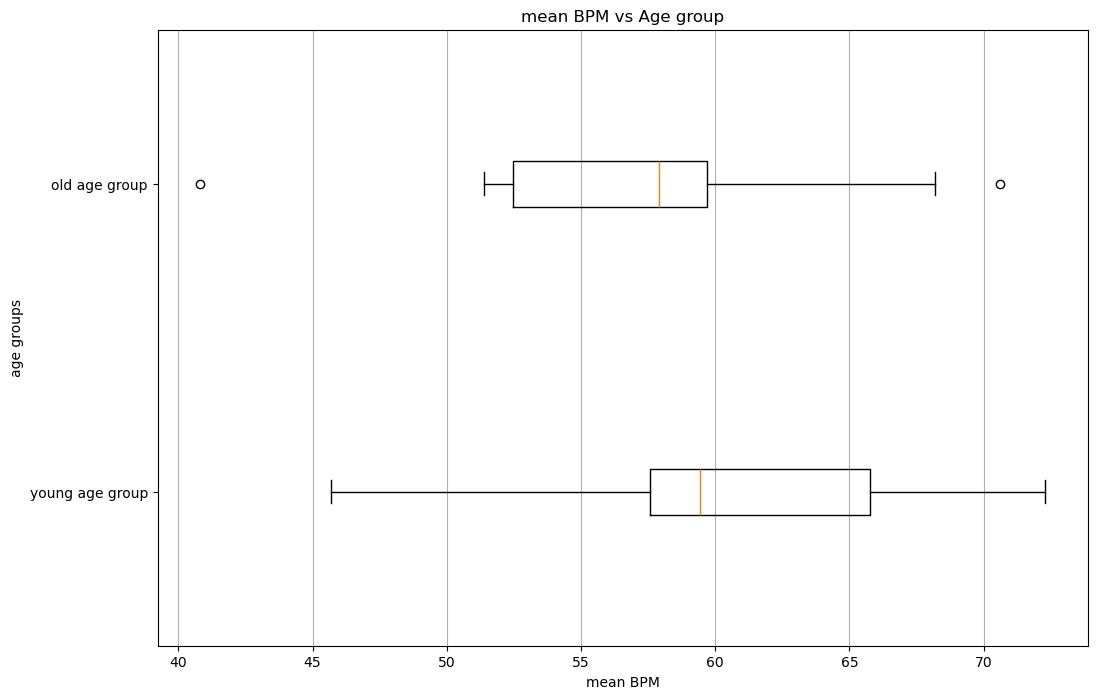

In [23]:
from scipy import stats
bpm_data_base_on_age_group = [hrv_df[hrv_df['age_group']==age]['mean_bpm'] for age in labels]

# calculate T-test for mean BPM
t_statistic, p_value = stats.ttest_ind(bpm_data_base_on_age_group[0],bpm_data_base_on_age_group[1])
print(f'T-test for mean BPM: t-statistic:{t_statistic}, p-value:{p_value}')

#visualise it
plt.figure(figsize=(12,8))
plt.boxplot(bpm_data_base_on_age_group,labels=labels, vert=False)
plt.xlabel('mean BPM')
plt.ylabel('age groups')
plt.grid(axis='x')
plt.title('mean BPM vs Age group')
plt.show()



#### In this T-test for mean BPM between young and old age group we get the T-statistic is around 0.81, this is a relatively small value, means no substantial difference of mean BPM in these two group. Similarly, the P-value is 0.43, which much greater than threshold 0.05, which means it's fail to reject H0, say ,there is no such difference between this two groups. we can easily observe this result in the figure i ploted above, the range of mean BPM in these two group is very similar，the meadian value in this two groups are in the same range of 50-60. 

T-test for RMSSD: t-statistic:2.498764078850751, p-value:0.02236539950488641


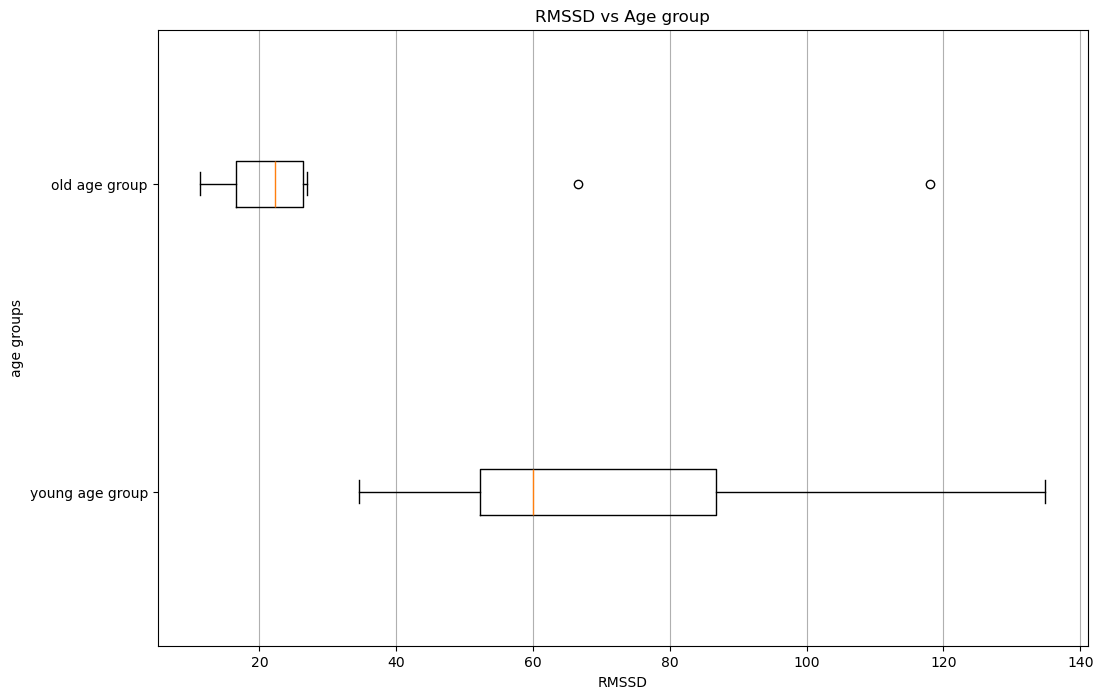

In [24]:
rmssd_data_base_on_age_group = [hrv_df[hrv_df['age_group']==age]['rmssd'] for age in labels]

# calculate T-test for mean BPM
t_statistic, p_value = stats.ttest_ind(rmssd_data_base_on_age_group[0],rmssd_data_base_on_age_group[1])
print(f'T-test for RMSSD: t-statistic:{t_statistic}, p-value:{p_value}')

#visualise it
plt.figure(figsize=(12,8))
plt.boxplot(rmssd_data_base_on_age_group,labels=labels, vert=False)
plt.xlabel('RMSSD')
plt.ylabel('age groups')
plt.grid(axis='x')
plt.title('RMSSD vs Age group')
plt.show()


#### In this T-test for RMSSD between young and old age group we get the T-statistic is around 1.85, this is a relatively big value, indicates there is a difference of RMSSD in these two group, but the difference is small. Similarly, the P-value is 0.081, although it's still greater than the threshold 0.05, but it's much close to 0.05. This suggests that while there may be a difference between of RMSSD in these two groups, this difference is not significant. Say ,there is a little difference between this two groups. we can easily observe this result in the figure i ploted above. There is no overlap between Q1-Q3 of boxplots for these two groups. there is only a little overlap where a little part of boxplot of 'old age group'is to the left whisper of the 'young age group' boxplot if we run out the outlier value of old age group. So there is little difference between these two group in RSSMD.


## TASK 6

### 6a: Write a short discussion that discusses the key observations that can be made from the Poincare plots, in terms of how they relate to the statistical analysis performed.

#### A-6a: I think the key observation is whether the dots in each figure are tighter or spread-out. Say if a figure especially like plots of y03.csv and y05.csv show more condensed cluster indicated less variability, which means the trend of heart rate variability is not significant. On the other hand, like the figure, in particular, plots of o07.csv and o09.csv show more spread-out that indicated more variability. it more likely have a significant trend of heart rate variability. these observation also enhance the evidence of the statistic analysis like T-test we did before that the different RMSSD between the young age group and old age group show the trend of higher heart rate variability seen in  older people.

### 6b: In this investigation we have applied the t-test to detect statistical differences. Critically evaluate the applicability of the test and suggest what additional or alternative approaches would be suitable (you may demonstrate if your wish).

#### A-6b: I think apply t-test to detect statistical differences in case of HRV is not the best approaches for the following reason. In the concept of T-test say the data in T-test must follow the normal distribution, but some statistical evidence like RMSSD may be skewed or exhibit non-normal distribution due to some reason like some physiological variability. so this assumption in t-test not always hold. Another constrain of T-test might not meet in this detection is equal variance, HRV can vary widely between individual, especially in between old and young group. different variance will make the results not very accurate even produce misleading results. 
#### An alternative approaches is using Bootstrapping, bootstrapping is a suitable approach for detecting statistical difference. Because Bootstrapping don't need for the data conform to a normal distribution and equal variance. Since this dataset is very small, say there are only 20 data, bootstrapping can perform well in such small data by resampling with replacement from this data set to estimate the sampling distribution of statistic. for each bootstrap sample, calculate the statistic(e.g. mean, median etc.), in this case, it will estimate the difference in means between different age group.


### 6c: What additional plots may be useful to view each recording before including it in the analysis. You may include an example plot/plots and explain why this would be useful.

#### A-6c: i think violin plot is a good approach to view each recording, there are many optional parameter like showmean, showmedian etc. which not only have some similar function to box plot, but also show the distribution of the data. we can see the example as follow, in these two violin figures shown, the normal distribution is not holds in data of RMSSD. Therefore t-test on these data may be not very accuracy. 


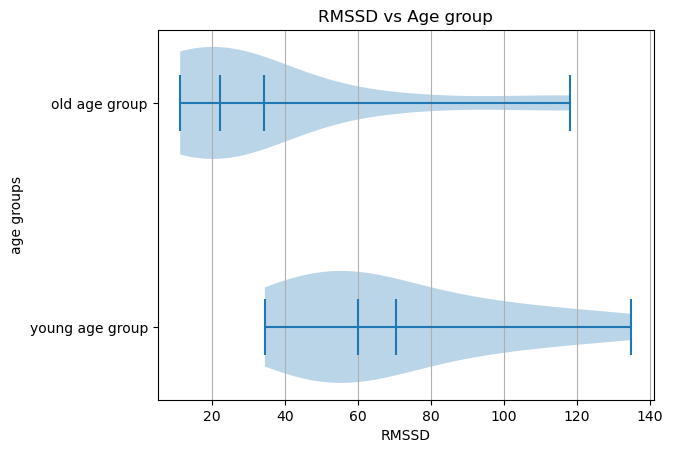

In [25]:
# create a violin plot using data of rmssd_data_base_on_age_group
plt.violinplot(rmssd_data_base_on_age_group,showmeans=True,showmedians=True,vert=False)
plt.xlabel('RMSSD')
plt.ylabel('age groups')
plt.grid(axis='x')
plt.title('RMSSD vs Age group')
plt.yticks([1,2],['young age group','old age group'])
plt.show()

   ### 6d: Explore the current research in this area and briefly set out the current understanding of heart rate and heart rate variability by age and gender. 
   
#### A-6d: in age side, heart rate generally increase with age, heart rate variability is opposite of heart rate, it generally decrease with age, both of these two phenomenas are due to some physiological reason. in gender side, man tend to have lower heart rate and higher heart rate variability, these are due to different heart structure and size or hormonal differences. i also put two violin plots below to support this result in gender side. 
            

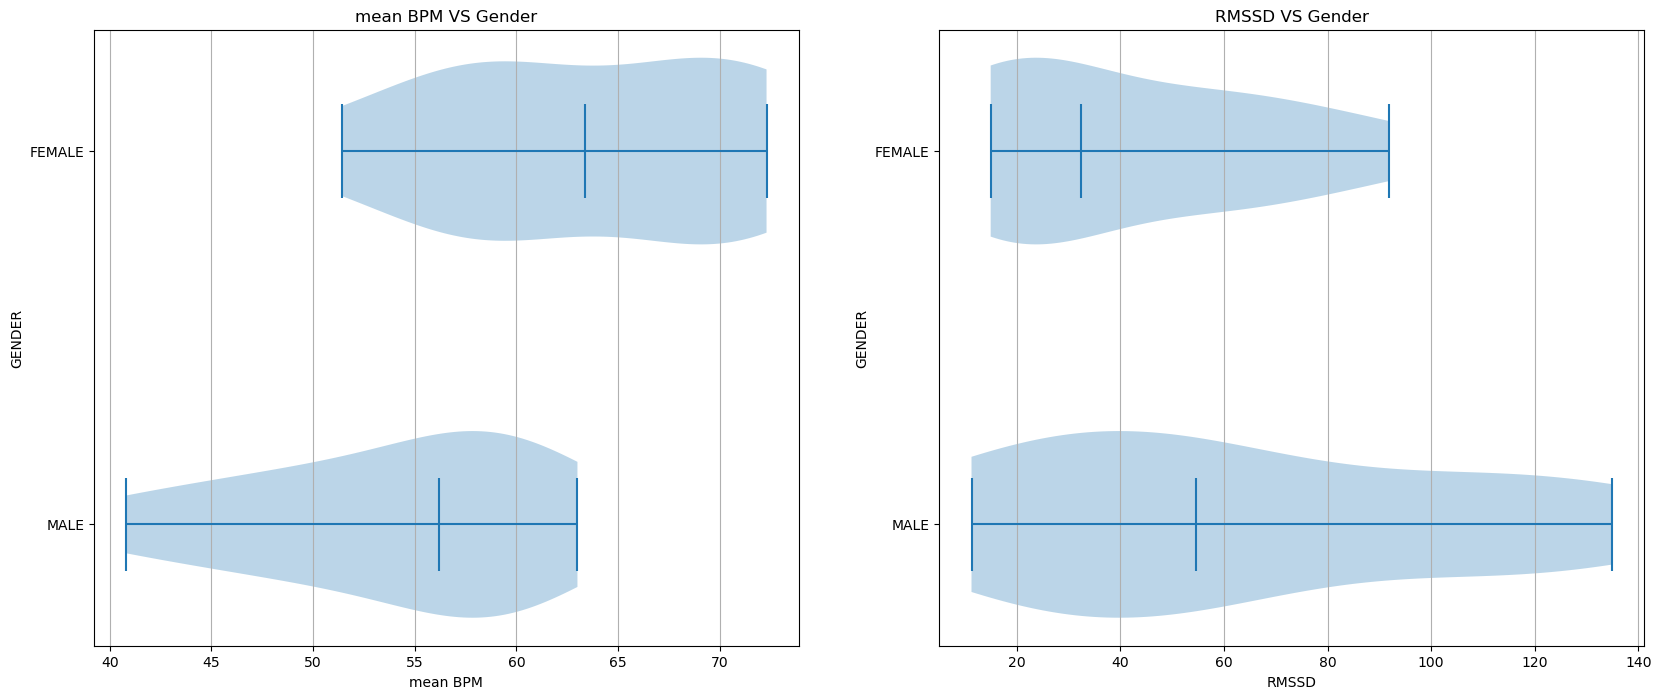

In [26]:
# filter the gender group of mean bpm and rmssd
gender_group_mean_bpm = [hrv_df[hrv_df['gender']=='M']['mean_bpm'],hrv_df[hrv_df['gender']=='F']['mean_bpm']]
gender_group_rmssd = [hrv_df[hrv_df['gender']=='M']['rmssd'],hrv_df[hrv_df['gender']=='F']['rmssd']]

# visualise them with violin plot
fig,ax = plt.subplots(1,2,figsize = (20,8))
ax[0].violinplot(gender_group_mean_bpm, showmedians=True,vert= False)
ax[0].set_title('mean BPM VS Gender')   
ax[0].set_yticks([1,2],['MALE','FEMALE'])
ax[0].set_xlabel('mean BPM')
ax[0].set_ylabel('GENDER')
ax[0].grid(axis='x')
ax[1].violinplot(gender_group_rmssd, showmedians=True,vert= False)
ax[1].set_title('RMSSD VS Gender')
ax[1].set_yticks([1,2],['MALE','FEMALE'])
ax[1].set_xlabel('RMSSD')
ax[1].set_ylabel('GENDER')
ax[1].grid(axis='x')
plt.show()